# Homework 9 - Polynomial Interpolations and SVD

## Exercise 1: Polynomial Interpolation Using Vandermonde Matrix

Utilize the Vandermonde matrix and polynomial interpolation to find the interpolating polynomial that passes through the given points. Additionally, plot the resulting polynomial and points for visualization.

Consider the following five points: $(-2, 5), (-1, -2), (0, 1), (2, 3), (3, 0)$.
- Use the Vandermonde matrix method to find the coefficients of the interpolating polynomial $p(x)$ that passes through the given points.
- Plot the resulting polynomial and the given points using `matplotlib` for visualization.

### Instructions

- Generate the Vandermonde matrix for the given $x_i$ values using `np.vander`.
- Solve the linear system to find the coefficients of the interpolating polynomial.
- Use the coefficients to define the polynomial function $p(x)$.
- Plot the function $p(x)$ over an appropriate interval that includes all given $x_i$ values.
- Overlay the plot with the given points to show the interpolation accuracy.

### Solution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-2, -1, 0, 2, 3])
y = np.array([5, -2, 1, 3, 0])

# Generate the Vandermonde matrix A
A = np.vander(x, increasing=True)

# Solve to find the coefficients of the polynomial
a = np.linalg.solve(A, y)

# Display the polynomial coefficients
a

array([ 1.        ,  4.16666667, -0.25      , -1.16666667,  0.25      ])

As such, the equation for the polynomial $p(x)$ is:

$$ p(x) = \frac{1}{4}x^4 - \frac{5}{3}x^3 - \frac{1}{4}x^2 + \frac{25}{6}x + 1 $$

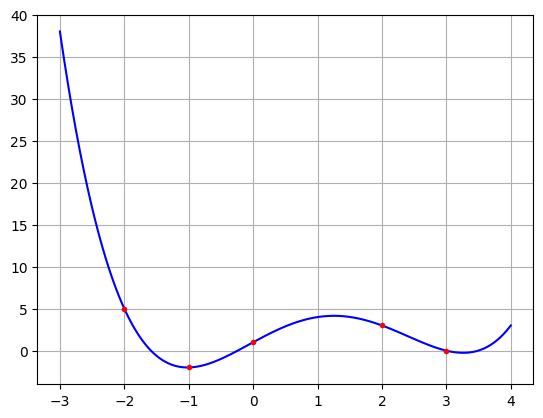

In [ ]:
x_vals = np.linspace(-3, 4, 100000)
y_vals = a[4] * x_vals**4 + a[3] * x_vals**3 + a[2] * x_vals**2 + a[1] * x_vals + a[0]

plt.plot(x_vals, y_vals, 'b-')
plt.plot(x, y, 'r.')
plt.grid(True)
plt.show()

## Exercise 2: Lagrange Polynomial Interpolation

Use Lagrange basis polynomials to determine the interpolating polynomial that fits the given set of points exactly.

Consider the following five points: $(1, 2), (2, 3), (3, 5), (4, 7), (5, 11)$.
- Derive the Lagrange basis polynomials $L_i(x)$ for $i = 0, \dots, 4$.
- Use these basis polynomials to form the interpolating polynomial $P(x)$.
- Show the detailed calculations on paper.

### Instructions

- Recall that the Lagrange basis polynomial $l_i(x)$ for the $i$-th data point is defined as:

  $$ l_i(x) = \prod^4_{\substack{j=0 \\ j \neq i}} \frac{x - x_j}{x_i - x_j}, $$

  where $x_0, x_1, \dots, x_4$ are the $x$-coordinates of the given points, and the product excludes the $i$-th term.

- The interpolating polynomial $P(x)$ is then given as a linear combination of these basis polynomials:

  $$ P(x) = \sum^4_{i=0} y_i * l_i(x) $$

- Perform the calculations for $l_i(x)$ for each $i$, and then compute $P(x)$.

### Solution

First, we must find the values of the Lagrange basis polynomials $l_i(x)$:

For $i = 0$,

$$
\begin{align*}
    l_0(x) &= \prod^4_{j=1} \frac{x - x_j}{x_0 - x_j} \\
    &= \prod^4_{j=1} \frac{x - x_j}{1 - x_j} \\
    &= \frac{x - 2}{1 - 2} * \frac{x - 3}{1 - 3} * \frac{x - 4}{1 - 4} * \frac{x - 5}{1 - 5} \\
    &= (2 - x) * \frac{3 - x}{2} * \frac{4 - x}{3} * \frac{5 - x}{4} \\
    &= \frac{1}{24} (2 - x)(3 - x)(4 - x)(5 - x) \\
    &= \frac{x^4}{24} - \frac{7x^3}{12} + \frac{71x^2}{24} - \frac{77x}{12} + 5
\end{align*}
$$

For $i = 1$,

$$
\begin{align*}
    l_0(x) &= \prod^4_{\substack{j = 0 \\ j \neq 1}} \frac{x - x_j}{x_1 - x_j} \\
    &= \prod^4_{\substack{j = 0 \\ j \neq 1}} \frac{x - x_j}{2 - x_j} \\
    &= \frac{x - 1}{2 - 1} * \frac{x - 3}{2 - 3} * \frac{x - 4}{2 - 4} * \frac{x - 5}{2 - 5} \\
    &= (x - 1) * (3 - x) * \frac{4 - x}{2} * \frac{5 - x}{3} \\
    &= \frac{1}{6} (x - 1)(3 - x)(4 - x)(5 - x) \\
    &= -\frac{x^4}{6} + \frac{13x^3}{6} - \frac{59x^2}{6} + \frac{107x}{6} - 10
\end{align*}
$$

For $i = 2$,

$$
\begin{align*}
    l_0(x) &= \prod^4_{\substack{j = 0 \\ j \neq 2}} \frac{x - x_j}{x_2 - x_j} \\
    &= \prod^4_{\substack{j = 0 \\ j \neq 2}} \frac{x - x_j}{3 - x_j} \\
    &= \frac{x - 1}{3 - 1} * \frac{x - 2}{3 - 2} * \frac{x - 4}{3 - 4} * \frac{x - 5}{3 - 5} \\
    &= \frac{x - 1}{2} * (x - 2) * (4 - x) * \frac{5 - x}{2} \\
    &= \frac{1}{4} (x - 1)(x - 2)(4 - x)(5 - x) \\
    &= \frac{x^4}{4} - 3x^3 + \frac{49x^2}{4} - \frac{39x}{2} + 10
\end{align*}
$$

For $i = 3$,

$$
\begin{align*}
    l_0(x) &= \prod^4_{\substack{j = 0 \\ j \neq 3}} \frac{x - x_j}{x_3 - x_j} \\
    &= \prod^4_{\substack{j = 0 \\ j \neq 3}} \frac{x - x_j}{4 - x_j} \\
    &= \frac{x - 1}{4 - 1} * \frac{x - 2}{4 - 2} * \frac{x - 3}{4 - 3} * \frac{x - 5}{4 - 5} \\
    &= \frac{x - 1}{3} * \frac{x - 2}{2} * (x - 3) * (5 - x) \\
    &= \frac{1}{6} (x - 1)(x - 2)(x - 3)(5 - x) \\
    &= -\frac{x^4}{6} + \frac{11x^3}{6} - \frac{41x^2}{6} + \frac{61x}{6} - 5
\end{align*}
$$

For $i = 4$,

$$
\begin{align*}
    l_0(x) &= \prod^3_{j = 0} \frac{x - x_j}{x_4 - x_j} \\
    &= \prod^3_{j = 0} \frac{x - x_j}{5 - x_j} \\
    &= \frac{x - 1}{5 - 1} * \frac{x - 2}{5 - 2} * \frac{x - 3}{5 - 3} * \frac{x - 5}{5 - 4} \\
    &= \frac{x - 1}{4} * \frac{x - 2}{3} * \frac{x - 3}{2} * (x - 4) \\
    &= \frac{1}{24} (x - 1)(x - 2)(x - 3)(x - 4) \\
    &= \frac{x^4}{24} - \frac{5x^3}{12} + \frac{35x^2}{24} - \frac{25x}{12} + 1
\end{align*}
$$

Now that we've calculated each value of $l_i(x)$, we can calculate $P(x)$:

$$
\begin{align*}
    P(x) &= \sum^4_{i=0} y_i * l_i(x) \\
    &= 2 l_0(x) + 3 l_1(x) + 5 l_2(x) + 7 l_3(x) + 11 l_4(x) \\
    &= 2(\frac{x^4}{24} - \frac{7x^3}{12} + \frac{71x^2}{24} - \frac{77x}{12} + 5) \\
    &+ 3(-\frac{x^4}{6} + \frac{13x^3}{6} - \frac{59x^2}{6} + \frac{107x}{6} - 10) \\
    &+ 5(\frac{x^4}{4} - 3x^3 + \frac{49x^2}{4} - \frac{39x}{2} + 10) \\
    &+ 7(-\frac{x^4}{6} + \frac{11x^3}{6} - \frac{41x^2}{6} + \frac{61x}{6} - 5) \\
    &+ 11(\frac{x^4}{24} - \frac{5x^3}{12} + \frac{35x^2}{24} - \frac{25x}{12} + 1) \\
    &= \frac{x^4}{8} - \frac{17x^3}{12} + \frac{47x^2}{8} - \frac{103x}{12} + 6
\end{align*}
$$

## Exercise 3: Newton's Polynomial Interpolation: Recursive Approach

Use Newton's Interpolation in a recursive manner for finding the interpolating polynomial that fits a given set of data points.

Let's consider the same five data points as before: $(1, 2), (2, 3), (3, 5), (4, 7), (5, 11)$. Use the recursive formula for Newton's interpolation to construct the interpolating polynomial for the given data points.
- Begin with $P_1(x) = a_0 + a_1(x - x_0)$ and then determine $a_0$ and $a_1$ using the first two points.
- Assume $P_{k-1}(x)$ is known and extend it to $P_k(x)$ by adding the new data point $(x_{k+1}, y_{k+1})$. The updated polynomial $P_k(x)$ can be expressed as:

  $$ P_k(x) = P_{k-1}(x) + a_k(x - x_0)(x - x_1) \dots (x - x_{k-1}) $$

  Determine the coefficient $a_k$ and continue.

- Write out the final interpolating polynomial $P_k(x)$ explicitly.

### Solution

To begin, let's find the polynomial interpolation $P_1(x)$ through the first two points. Note that this polynomial is the line between these points.

$$
\begin{align*}
    P_1(x) &= a_0 + a_1(x - x_0) \\
    &= 2 + 1 (x - 1)
\end{align*}
$$

Thus, $a_0 = 2$ and $a_1 = 1$.

If we assume $P_{k-1}(x)$ is known, we can express $P_k(x)$ as:

$$ P_k(x) = P_{k-1}(x) + a_k(x - x_0)(x - x_1) \dots (x - x_{k-1}) $$

Now, we can determine $a_k$:

$$ a_k = \frac{y_k - \sum^{k-1}_{i=0} a_i \prod^{i - 1}_{j = 0} (x_k - x_j)}{\prod^{k - 1}_{j = 0} (x_k - x_j)} $$

Now, we can determine $a_2$:

$$
\begin{align*}
    a_2 &= \frac{5 - a_1(3 - 2)(3 - 1) - a_0(3 - 1)}{(3 - 2)(3 - 1)} \\
    &= \frac{5 - 2 - 4}{2} \\
    &= -\frac{1}{2}
\end{align*}
$$

And $P_2(x)$:

$$
\begin{align*}
    P_2(x) &= P_1(x) + a_2(x - x_1)(x - x_0) \\
    &= -\frac{1}{2}(x - 2)(x - 1) + x + 1 \\
    &= -\frac{x^2}{2} + \frac{5x}{2} 
\end{align*}
$$

Now, we can determine $a_3$:

$$
\begin{align*}
    a_3 &= \frac{7 - a_2(4 - 3)(4 - 2)(4 - 1) - a_1(4 - 2)(4 - 1) - a_0(4 - 1)}{(4 - 3)(4 - 2)(4 - 1)} \\
    &= \frac{7 + 3 - 6 - 6}{6} \\
    &= -\frac{1}{3}
\end{align*}
$$

And $P_3(x)$:

$$
\begin{align*}
    P_3(x) &= P_2(x) + a_3(x - x_2)(x - x_1)(x - x_0) \\
    &= -\frac{1}{3}(x - 3)(x - 2)(x - 1) - \frac{x^2}{2} + \frac{5x}{2}  \\
    &= - \frac{x^3}{3} + \frac{3x^2}{2} - \frac{7x}{6} + 2
\end{align*}
$$

Now, we can determine $a_4$:

$$
\begin{align*}
    a_4 &= \frac{11 - a_3(5 - 4)(5 - 3)(5 - 2)(5 - 1) - a_2(5 - 3)(5 - 2)(5 - 1) - a_1(5 - 2)(5 - 1) - a_0(5 - 1)}{(5 - 4)(5 - 3)(5 - 2)(5 - 1)} \\
    &= \frac{11 + 8 + 12 - 12 - 8}{24} \\
    &= \frac{11}{24}
\end{align*}
$$

And $P_4(x)$:

$$
\begin{align*}
    P_4(x) &= P_3(x) + a_4(x - x_3)(x - x_2)(x - x_1)(x - x_0) \\
    &= \frac{11}{24}(x - 4)(x - 3)(x - 2)(x - 1) - \frac{x^3}{3} + \frac{3x^2}{2} - \frac{7x}{6} + 2 \\
    &= \frac{11x^4}{24} - \frac{59x^3}{12} + \frac{421x^2}{24} - \frac{289x}{12} + 13
\end{align*}
$$

## Exercise 4: Manual SVD Decomposition

This assignment aims to manually compute the Singular Value Decomposition (SVD) of a given $4 \times 6$ matrix of integers, understanding the underlying mathematical process.

### Tasks

- Generate a random $4 \times 6$ matrix $A$ of integers.
- Compute $AA^T$ to find the left singular vectors and singular values.
- Construct the matrix $U$ and $\Sigma$ from the eigenvectors and eigenvalues, respectively.
- Determine the right singular vectors to form the matrix $V^T$.
- Implement a Python function that performs these steps and returns $U$, $\Sigma$, and $V^T$.

### Solution

In [ ]:
def manual_svd(A) -> tuple:

    AAT = np.dot(A, A.T)
    ATA = np.dot(A.T, A)

    left_eigenvalues, left_eigenvectors = np.linalg.eig(AAT)
    sorted_idx = left_eigenvalues.argsort()[::-1]
    left_eigenvectors = left_eigenvectors[sorted_idx]
    # U = left_eigenvectors
    U = np.zeros(A.shape)
    for i in range(A.shape[0]):
        U[:, i] = left_eigenvectors[i, :]

    Sigma = np.zeros(A.shape)
    for i in range(A.shape[0]):
        Sigma[i, i] = np.sqrt(left_eigenvalues[i])

    right_eigenvalues, right_eigenvectors = np.linalg.eig(ATA)
    sorted_idx = right_eigenvalues.argsort()[::-1]
    right_eigenvectors = right_eigenvectors[sorted_idx]
    VT = np.zeros(A.shape)
    for i in range(A.shape[0]):
        VT[i, :] = -right_eigenvectors[:, i]

    return U, Sigma, VT

In [ ]:
A = np.random.randint(low=-10, high=10, size=(4, 6))
U, Sigma, VT = manual_svd(A)
print(U)
print(Sigma)
print(VT)

[[-0.25586542 -0.29926779  0.54920108 -0.73712268  0.          0.        ]
 [-0.44293171  0.18459037  0.66395908  0.57349476  0.          0.        ]
 [-0.42722518  0.80921514 -0.21556753 -0.34085208  0.          0.        ]
 [ 0.7455354   0.47067615  0.45942046 -0.10758145  0.          0.        ]]
[[ 3.85875344  0.          0.          0.          0.          0.        ]
 [ 0.         10.41395696  0.          0.          0.          0.        ]
 [ 0.          0.         18.1598237   0.          0.          0.        ]
 [ 0.          0.          0.         15.90221135  0.          0.        ]]
[[-0.63150858 -0.22381847  0.34296602  0.50658998 -0.38145714 -0.17701286]
 [-0.06166385  0.46173104  0.19154285  0.07175947  0.44161547 -0.73901266]
 [ 0.12827464 -0.14899009 -0.74324313  0.6059926   0.09539318 -0.18058331]
 [ 0.42873575  0.10348423 -0.03885146 -0.12682481 -0.76479439 -0.45052442]]


C:\Users\meat1\AppData\Local\Temp\ipykernel_29784\3404186521.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  VT[i, :] = -right_eigenvectors[:, i]


In [ ]:
print(np.dot(U, np.dot(Sigma, VT)))

ValueError: shapes (4,6) and (4,6) not aligned: 6 (dim 1) != 4 (dim 0)

## Exercise 5: Low-Rank Approximation Using SVD

This assignment explores the concept of low-rank approximation of matrices using Singular Value Decomposition (SVD), emphasizing the importance of singular values in capturing the essence of data.

### Tasks

- Generate a random $300 \times 1000$ matrix $A$ of real numbers.
- Compute the SVD of matrix $A$ and extract its singular values.
- Plot the singular values of $A$ to visualize their distribution.
- Determine the rank $k$ for the approximation, ensuring $k$ is chosen based on the graph of the singular values.
- Determine the low-rank approximation $A_k$ of $A$.

### Solution

In [ ]:
A = np.random.randint(size=(300, 1000))